In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('student-mat.csv')
df1 = df[df.columns[1:12]]

In [3]:
f = lambda word: "".join([word[0].upper(), word[1:]])
f('asdas')

'Asdas'

In [33]:
df1['Mjob'] = df1['Mjob'].apply(f)
df1['Fjob'] = df1['Fjob'].apply(f)

In [4]:
print(id(df), id(df1))
print(df is df1)

1691656292616 1691349911088
False


Оригинальный набор данных все еще строчный, потому что df1 это новый объект, который ссылается на новую ячейку памяти

In [5]:
df['Mjob'] = df['Mjob'].apply(f)
df['Fjob'] = df['Fjob'].apply(f)

In [6]:
# Шаг 9
df1['age'].value_counts()/len(df1['age'])*100

16    26.329114
17    24.810127
18    20.759494
15    20.759494
19     6.075949
20     0.759494
22     0.253165
21     0.253165
Name: age, dtype: float64

In [7]:
# шаг 10
df.groupby('age')[['Walc','Dalc']].mean()

,Walc,Dalc
age,,
15,1.902439,1.353659
16,2.278846,1.432692
17,2.571429,1.520408
18,2.414634,1.548780
19,1.958333,1.458333
20,2.333333,2.000000
21,3.000000,3.000000
22,5.000000,5.000000


In [8]:
# Шаг 11
df.groupby('sex')[['Walc','Dalc']].mean()

,Walc,Dalc
sex,,
F,1.956731,1.254808
M,2.663102,1.732620


In [9]:
# Опицональное
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,At_home,Other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,Health,Services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,Other,Other,...,4,3,2,1,2,5,4,6,10,10


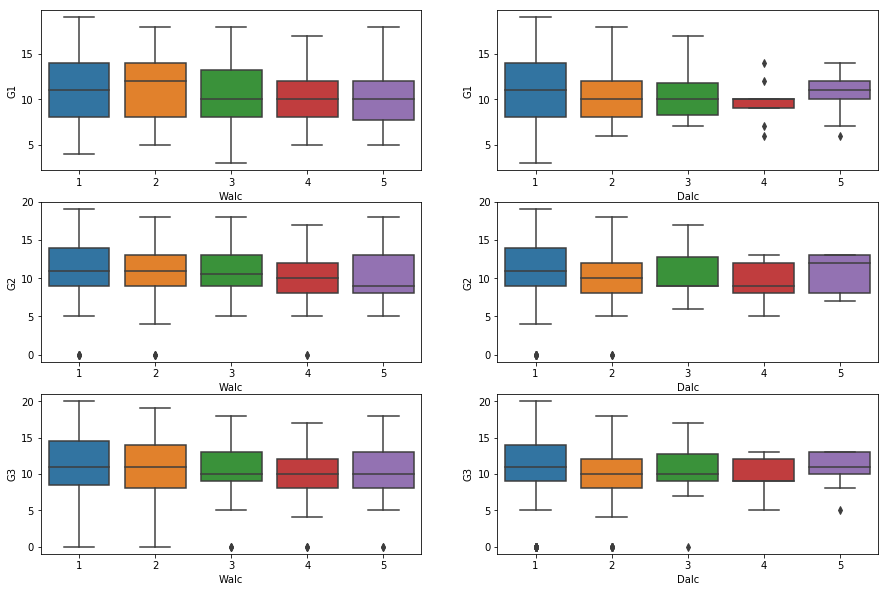

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

for i,feat in enumerate(['G1','G2','G3']):
    for j,col in enumerate(['Walc','Dalc']):
        sns.boxplot(y=feat, x=col, data=df,  orient='v' , ax=axes[i][j])

По этим график видно, что в принципе нет четко выраженной связи между потреблением алкоголя и успеваемостью

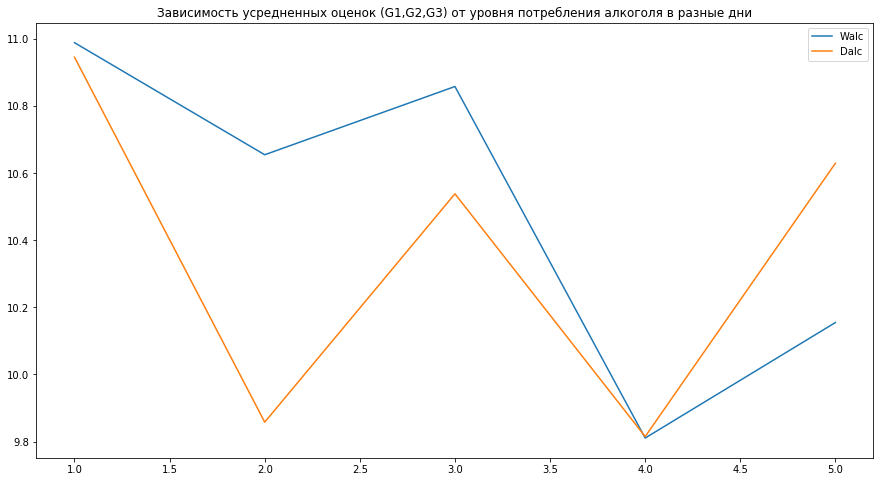

In [50]:
dalc = df.groupby('Dalc')[['G1','G2','G3']].mean()
walc = df.groupby('Walc')[['G1','G2','G3']].mean()

fig = plt.figure(figsize=(15, 8))
plt.plot(np.arange(1,6,1), walc.mean(axis=1), label='Walc')
plt.plot(np.arange(1,6,1), dalc.mean(axis=1), label='Dalc')
plt.title('Зависимость усредненных оценок (G1,G2,G3) от уровня потребления алкоголя в разные дни')
plt.legend()
plt.show()

Хотя ученики, которые потребляют алкоголь в выходные, имеют оценки в среднем хуже. Но все равно нельзя сказать, что если линейная зависимость. Особенно сильно проседают ученики, которые пьют на уровне 4 (идет резкое падение с уровня 3)